In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [97]:
df = pd.read_excel('heart.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
from sklearn.preprocessing import OneHotEncoder

In [99]:
df.sex.value_counts().to_dict()
df['sex'].replace({'male': 0, 'female': 1},inplace = True)

In [100]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,1,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,1,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [102]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [103]:
df.corr()[-1:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
target,-0.225439,0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.13723,0.421741,-0.436757,-0.430696,0.345877,-0.391724,-0.344029,1.0


## smote sampling

In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
x = df.drop('target',axis = 1)
y = df['target']

In [106]:
smote = SMOTE(k_neighbors = 3, sampling_strategy = 0.96)
x_re,y_re = smote.fit_resample(x,y)

In [107]:
y_re.value_counts()/len(y_re) * 100


1    51.083591
0    48.916409
Name: target, dtype: float64

## model training

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x_re,y_re,test_size = 0.3,stratify = y_re,random_state = 5)

In [109]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((226, 13), (97, 13), (226,), (97,))

In [110]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
y_pred = model.predict(x_test)

In [112]:
from mlxtend.plotting import plot_confusion_matrix

In [113]:
def model_eval(model,x,y):
    plt.figure(figsize = (2,2))
    y_pred = model.predict(x)
    cm = confusion_matrix(y,y_pred)
    print(f"Confusion Matrix = \n{cm}")
    
    clf = classification_report(y,y_pred)
    print(f"Classification Report = \n{clf}")
    
    acc = accuracy_score(y,y_pred)
    print(f"Accuracy Score = {acc}")
    
    return plot_confusion_matrix(cm) 

Confusion Matrix = 
[[34 13]
 [ 5 45]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        47
           1       0.78      0.90      0.83        50

    accuracy                           0.81        97
   macro avg       0.82      0.81      0.81        97
weighted avg       0.82      0.81      0.81        97

Accuracy Score = 0.8144329896907216


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 200x200 with 0 Axes>

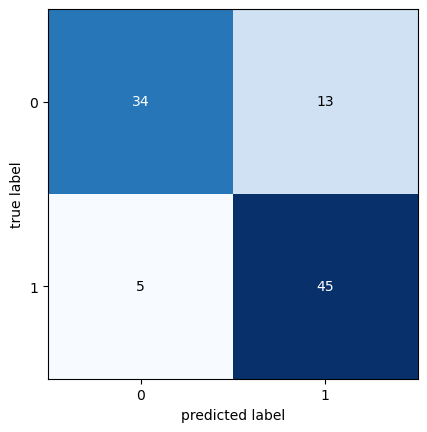

In [114]:
model_eval(model,x_test,y_test)

Confusion Matrix = 
[[ 88  23]
 [  9 106]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       111
           1       0.82      0.92      0.87       115

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226

Accuracy Score = 0.8584070796460177


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 200x200 with 0 Axes>

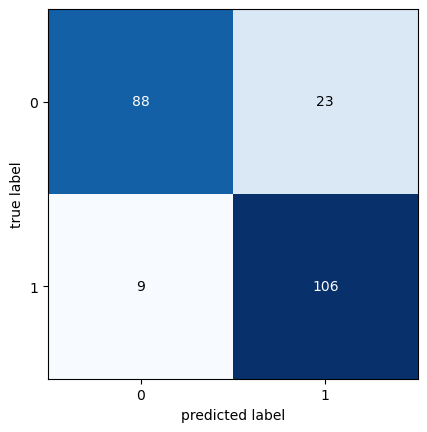

In [115]:
model_eval(model,x_train,y_train)

In [116]:
## KNN Classifier

In [117]:
scaler = MinMaxScaler()
scaler.fit(x)
arr = scaler.fit_transform(x)
x_norm =  pd.DataFrame(arr,columns = x.columns)
x_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,0.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,0.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,1.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,0.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,1.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,1.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,0.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,0.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,0.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


## model training

In [118]:
y = df['target']

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size = 0.3,random_state = 5,stratify = y)

In [120]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [121]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

Confusion Matrix = 
[[ 81  16]
 [ 12 103]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        97
           1       0.87      0.90      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212

Accuracy Score = 0.8679245283018868


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 200x200 with 0 Axes>

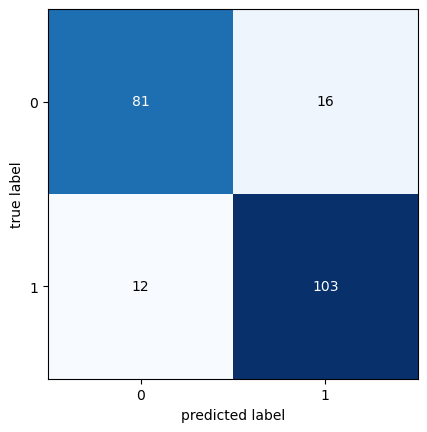

In [122]:
model_eval(knn,x_train,y_train)

Confusion Matrix = 
[[33  8]
 [12 38]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.83      0.76      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

Accuracy Score = 0.7802197802197802


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 200x200 with 0 Axes>

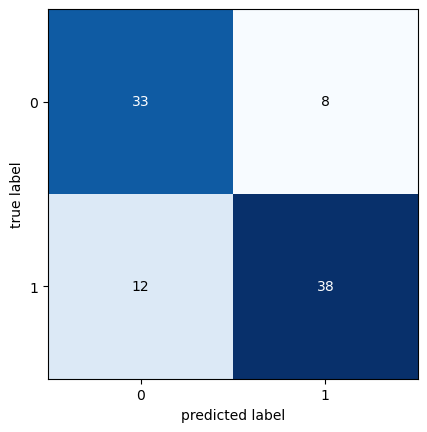

In [123]:
model_eval(knn,x_test,y_test)

## User Defined Functions

In [124]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [125]:
import json
import pickle

In [126]:
project_data = {'columns_name':x.columns.tolist(),'gender':{'male':0,'female':1}}

with open('project_data.json','w') as file :
    json.dump(project_data,file)

In [130]:
age = 63
sex = 'male'
cp = 3
trestbps = 145
chol = 233
fbs = 1
restecg = 0 
thalach = 150
exang = 0
oldpeak = 2.3 
slope = 0
ca = 0
thal = 1

gender = project_data['gender'][sex]

user_data = np.zeros(len(x.columns))
user_data[0] = age
user_data[1] = gender
user_data[2] = cp
user_data[3] = trestbps
user_data[4] = chol
user_data[5] = fbs
user_data[6] = restecg
user_data[7] = thalach 
user_data[8] = exang
user_data[9] = oldpeak
user_data[10] = slope
user_data[11] = ca
user_data[12] = thal

In [141]:
with open('heart.pkl','wb') as file:
    pickle.dump(knn,file)

In [142]:
with open('heart_scale.pkl','wb') as file:
    pickle.dump(scaler,file)

In [143]:
with open('heart_scale.pkl','rb') as file:
    scale = pickle.load(file)
    print(scale)

MinMaxScaler()


In [144]:
with open('heart.pkl','rb') as file:
    modell = pickle.load(file)
    print(modell)

KNeighborsClassifier()


In [147]:
scaler = scale.fit([user_data]) 
x = scaler.transform([user_data])

In [149]:
pred = modell.predict(x)
pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1], dtype=int64)